# Q1. Downloading the data

In [1]:
## Create Folder
# !mkdir data
# %cd data
## January
# !curl https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet --output yellow_tripdata_2023-01.parquet
## February
# !curl https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet --output yellow_tripdata_2023-02.parquet

# %cd ..

In [2]:
# Importing Libraries
import pandas as pd

# Load Data
pd_jan = pd.read_parquet("./data/yellow_tripdata_2023-01.parquet")
pd_feb = pd.read_parquet("./data/yellow_tripdata_2023-02.parquet")

pd_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
# 1- Number of Columns in the January dataset
print(f"Number of Columns in the January dataset: {pd_jan.shape[1]}")

Number of Columns in the January dataset: 19


# Q2. Computing duration

In [4]:
# create duration column
pd_jan["duration"] = pd_jan.tpep_dropoff_datetime - pd_jan.tpep_pickup_datetime
# convert duration to minutes
pd_jan["duration"] = pd_jan["duration"].dt.total_seconds() / 60
pd_jan["duration"]

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3066766, dtype: float64

In [5]:
# 2- Standard deviation of the duration in the January dataset
print(f"Standard deviation of the duration in the January dataset: {pd_jan['duration'].std()}")

Standard deviation of the duration in the January dataset: 42.59435124195458


# Q3. Dropping outliers

In [6]:
import seaborn as sns
import numpy as np

# drop ouliers that are less than one minute or more than 60 minutes
pd_jan_filtered = pd_jan[(pd_jan["duration"] > 1) & (pd_jan["duration"] < 60)]

# The percentage of trips that are more than one minute or less than 60 minutes
print(f"The percentage of trips that are more than one minute or less than 60 minutes: {pd_jan_filtered.shape[0] / pd_jan.shape[0] * 100}%")

The percentage of trips that are more than one minute or less than 60 minutes: 98.11146334607858%


# Q4. One-hot encoding

In [7]:
from sklearn.feature_extraction import DictVectorizer

# Create a dictionary of the pickup and dropoff location IDs
dict_jan = pd_jan_filtered[["PULocationID", "DOLocationID"]].astype(str).to_dict(orient="records")
# Fit a dictionary vectorizer
dv = DictVectorizer()
X_train = dv.fit_transform(dict_jan)

In [8]:
print("Number of columns in the training dataset: ", X_train.shape[1])

Number of columns in the training dataset:  515


# Q5. Training a model

In [9]:
# Training the model
from sklearn.linear_model import LinearRegression

# define the target value
y_train = pd_jan_filtered["duration"].values

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Evaluationg the model
y_pred = model.predict(X_train)

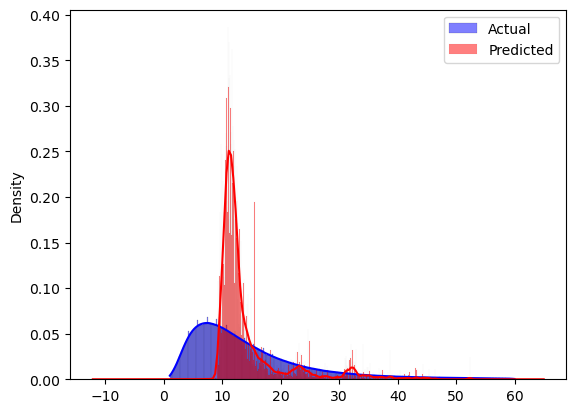

In [11]:
# plot the distribution of the predicted values and the actual values
import matplotlib.pyplot as plt

sns.histplot(y_train, color="blue", kde=True, label="Actual", stat="density")
sns.histplot(y_pred, color="red", kde=True, label="Predicted", stat="density")
plt.legend()

In [12]:
# calculate the root mean squared error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  7.647511937752464


# Q6. Evaluating the model


In [17]:
# Preprocess the evaluation data
pd_feb["duration"] = pd_feb.tpep_dropoff_datetime - pd_feb.tpep_pickup_datetime
pd_feb["duration"] = pd_feb["duration"].dt.total_seconds() / 60
pd_feb_filtered = pd_feb[(pd_feb["duration"] > 1) & (pd_feb["duration"] < 60)]
dict_feb = pd_feb_filtered[["PULocationID", "DOLocationID"]].astype(str).to_dict(orient="records")
X_eval = dv.transform(dict_feb)
y_eval = pd_feb_filtered["duration"].values

In [18]:
y_pred_eval = model.predict(X_eval)
# calculate RMSE for the evaluation data
rmse_eval = np.sqrt(mean_squared_error(y_eval, y_pred_eval))
print("Root Mean Squared Error for the evaluation data: ", rmse_eval)

Root Mean Squared Error for the evaluation data:  7.808396139580407


Amirali Soltanmohammadi - 2024